# **Final Project - Applied Mathematics**
# The following notebook is the code for simulation.

The Agent class is defined as follow:

In [ ]:
class Agent:
    def __init__(self, infected, immune, remaining_days_of_infection, remaining_days_of_immunity):
        self.infected = infected
        self.immune = immune
        self.remaining_days_of_infection = remaining_days_of_infection
        self.remaining_days_of_immunity = remaining_days_of_immunity
        self.susceptible=True

The following function for picking two rando agents.

In [ ]:
import random
def PickTwoAgentsWithContacts(numAgents):
    """
    Randomly selects two different agent indices from the range [0, numAgents-1]
    with a probability of being in contact.

    Parameters:
    - numAgents (int): The total number of agents.
    - contact_prob (float): The probability of two agents being in contact.

    Returns:
    - tuple: A tuple containing two distinct agent indices.
    """
    # Randomly select two initial indices
    index1 = random.randint(0, numAgents - 1)
    index2 = random.randint(0, numAgents - 1)

    # Ensure the selected indices are different
    while index1 == index2 :
        index1 = random.randint(0, numAgents - 1)
        index2 = random.randint(0, numAgents - 1)

    return index1, index2

The following function for initilaizing the agents array

In [ ]:
import random

def start_step(agents,number_of_agents,infected_at_start,immunity_duartion,infection_duration):
  if infected_at_start  > number_of_agents:
            raise ValueError("Number of initially infected agents cannot exceed the total number of agents.")
 ## create agents
  for i in range(0,number_of_agents):
    agents.append(Agent(False,False,immunity_duartion,infection_duration))
  ## infect random subset at the start
  infected_indices = random.sample(range(number_of_agents), infected_at_start)
  for index in infected_indices:
        agents[index].infected = True
        agents[index].remaining_days_of_infection = infection_duration
        agents[index].susceptible=False
  return agents

The following code for infecting agent

In [ ]:
import random

def infect(agent1,agent2,infection_probability,infection_duration):
    random_number = random.random()
    # If agent1 is not infected
    if not agent1.infected and agent2.infected and not agent1.immune and random_number < infection_probability:
        agent1.infected = True
        agent1.remaining_days_of_infection = infection_duration
        #overall_infected += 1
        ##susceptibles-=1
        agent1.susceptible=False
    # If agent2 is not infected
    elif not agent2.infected and agent1.infected and not agent2.immune and random_number < infection_probability:
        agent2.infected = True
        agent2.remaining_days_of_infection = infection_duration
        #overall_infected += 1
        agent2.susceptible=False

        ##susceptibles-=1
    return agent1, agent2

The following code for death and birth

In [ ]:
import numpy as np

def Birth_death(agents, birth_pulse, birth_rate_yearly, infected_per_birth_duration, birth_interval, birth_duration, immunity_duration, infection_duration, new_born, deads,N):
    num_new_agents = 0
    num_dead_agents = 0
    b = 0.1
    m=(birth_rate_yearly-b)/int(N)



    # Check if the birth pulse matches the birth interval
    if birth_pulse % birth_interval < birth_duration:
        # Calculate the expected number of new agents over the birth duration
        expected_new_agents_over_duration = birth_rate_yearly * len(agents)

        # Generate the number of new agents using Poisson distribution
        num_new_agents = np.random.poisson(expected_new_agents_over_duration/birth_duration)

        # Create new agents with the specified parameters
        agents = create_new_agents(agents, num_new_agents, infected_per_birth_duration, immunity_duration, infection_duration)
        new_born.append(num_new_agents)

    # Calculate daily death rate
    death_rate = m * len(agents) + b
    #daily_death_rate = 1 - pow((1 - death_rate), 1 / birth_interval)
    daily_death_rate=death_rate/birth_interval
    #print(daily_death_rate)

    # Generate the number of dead agents using binomial distribution
    num_dead_agents = np.random.binomial(len(agents), daily_death_rate)

    # Remove dead agents
    agents = remove_dead_agents(agents, num_dead_agents)

    return agents, new_born, num_dead_agents

The following code for revmoving dead agents

In [ ]:
def remove_dead_agents(agents, num_dead_agents):
    global NumberOfInfected
    if num_dead_agents >= len(agents):
        agents.clear()
    else:
        for _ in range(num_dead_agents):
            index = random.randint(0, len(agents) - 1)
            agents.pop(index)
    return agents

The following code for creating new agents with specifec number of infected agents

In [ ]:
def create_new_agents(agents, num_new_agents,infected_per_birth_duration, immunity_duration, infection_duration):
    number=0
    if infected_per_birth_duration > len(agents):
        number = len(agents)
    else :
      number=infected_per_birth_duration

    for i in range(num_new_agents):
        if i < number:
            agents.append(Agent(True, False, immunity_duration, infection_duration))

        else:
            agents.append(Agent(False, False, immunity_duration, infection_duration))

    return agents

The following code is for updating the parameters after each simulation step

In [ ]:
def update_params(agents, immunity_duration,Overall_infected,susceptibles):
    for i in range(len(agents)):
        if agents[i].infected:
            # If the agent is infected
            agents[i].remaining_days_of_infection -= 1

            if agents[i].remaining_days_of_infection == 0:
                # The agent has ended the duration of infection and started the immunity duration
                agents[i].infected = False
                agents[i].immune = True
                agents[i].remaining_days_of_immunity = immunity_duration
                #Overall_infected -= 1

        else:
            if agents[i].immune:
                # The agent is immune
                agents[i].remaining_days_of_immunity -= 1

                if agents[i].remaining_days_of_immunity == 0:
                    # The agent has ended the immunity duration
                    agents[i].immune = False
                   # susceptibles+=1
                    agents[i].susceptible=True
    Overall_infected=sum(agent.infected == True for agent in agents)

    susceptibles=sum(agent.susceptible == True for agent in agents)
    return agents,Overall_infected,susceptibles

The following code is the main simulation

Enter your R0:2
Enter the number of the susceptiples you want to stabilize around:500
infection probabilty is  : 0.3333333333333333


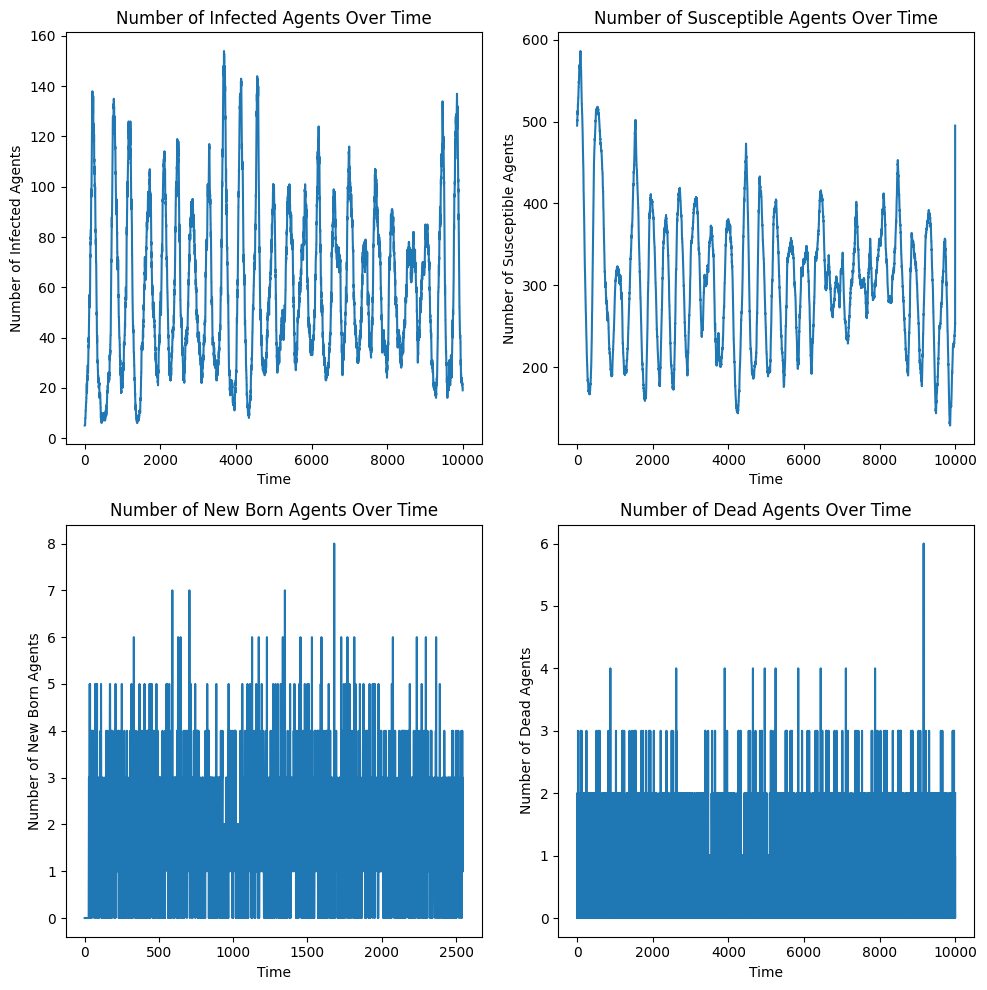

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

##parameters
infection_duration=60
immunity_duration=180
number_of_agents=500
simualtion_duration= 10000
birth_rate_yearly=0.3
birth_interval=365
birth_duration=90
infected_at_start=5
new_born=[0]* int(simualtion_duration/birth_interval)
infected=[0]* int(simualtion_duration)
deads=[0]* int(simualtion_duration)
birth_pulse=0
susceptibles= [0]* int(simualtion_duration)
sus=0
infected=0
overALL_infected=[0]* int(simualtion_duration)
##
infected_per_birth_duration=0
number_of_interactions_per_day_per_agent=1/10
R0=input("Enter your R0:")
TMP=infection_duration*number_of_interactions_per_day_per_agent
infection_probability=float(R0)/TMP
N=input("Enter the number of the susceptiples you want to stabilize around:")

print(f"infection probabilty is  : {infection_probability}")
overall_infected=0
##

agents=[]
agents=start_step(agents,number_of_agents,infected_at_start,immunity_duration,infection_duration)
overALL_infected[0]=(infected_at_start)
susceptibles.append(len(agents)-infected_at_start)
number_of_interactions_per_day = int(len(agents) *number_of_interactions_per_day_per_agent // 2)



for i in range(simualtion_duration):
  for j in range(number_of_interactions_per_day):
    index1, index2 = PickTwoAgentsWithContacts(len(agents))
    agent1, agent2=infect(agents[index1],agents[index2],infection_probability,infection_duration)
  birth_pulse += 1
  agents, new_born, num_dead_agents=Birth_death(agents,birth_pulse,birth_rate_yearly,infected_per_birth_duration,birth_interval,birth_duration,immunity_duration,infection_duration,new_born,deads,N)
  deads[i]=(num_dead_agents)
  agents,infected,sus=update_params(agents, immunity_duration,infected,sus)
  susceptibles[i]=(sus)
  overALL_infected[i]=(infected)



### following section for plotting the results

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Adjust the width and height as needed

# Plotting the number of infected agents over time
axs[0, 0].plot(overALL_infected, label='Infected')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Number of Infected Agents')
axs[0, 0].set_title('Number of Infected Agents Over Time')

# Plotting the number of susceptible agents over time
axs[0, 1].plot(susceptibles, label='Susceptible')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Number of Susceptible Agents')
axs[0, 1].set_title('Number of Susceptible Agents Over Time')

# Plotting the number of new born agents over time
axs[1, 0].plot(new_born, label='New Born')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Number of New Born Agents')
axs[1, 0].set_title('Number of New Born Agents Over Time')

# Plotting the number of dead agents over time
axs[1, 1].plot(deads, label='Dead')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Number of Dead Agents')
axs[1, 1].set_title('Number of Dead Agents Over Time')

# Adjust layout
plt.tight_layout()

# Save the plots as a PDF file
plt.savefig('simulation_results.pdf')

# Show the plots
plt.show()